<a href="https://colab.research.google.com/github/Tasneem-Hassaan/End-to-End/blob/main/End_To_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='maroon'>**Dataset Selection**</font>



## **Overview**:  
The dataset contains responses from university students collected via an online survey about their experiences, familiarity, and attitudes toward AI tools in educational settings. It captures demographic details alongside measures of AI awareness, usage patterns, perceived benefits, ethical concerns, and overall trust in AI applications.

## **Key Features**:  
- **Demographics**: Age, gender, field of study, and academic year.  
- **AI Awareness & Knowledge**: Self-reported familiarity with AI concepts, sources of information, and prior exposure.  
- **Usage Patterns**: Frequency and context of AI tool use (e.g., chatbots, adaptive learning platforms).  
- **Perceptions & Attitudes**: Opinions on AI’s impact on learning effectiveness, academic integrity, and skill development.  
- **Perceived Benefits & Risks**: Identified advantages (personalized feedback, efficiency) and drawbacks (overreliance, misinformation, ethical issues).

## **Purpose**:  
This dataset is designed to enable educators, researchers, and policymakers to:  
- Segment students by AI familiarity and usage.  
- Identify facilitators and barriers to AI adoption in learning.  
- Inform the design of AI-enhanced educational tools and support services.  
- Develop guidelines around AI ethics, academic integrity, and digital literacy.

## **Dataset Source**:  
Petrașcu, G.-M. (2025) *Survey on Students’ Perceptions of AI in Education*, Kaggle. Available at: https://www.kaggle.com/datasets/gianinamariapetrascu/survey-on-students-perceptions-of-ai-in-education (Accessed: 5 June 2025).


# <font color='maroon'>**Setup and Importing**</font>



In [63]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Metrics
from sklearn.metrics import r2_score, mean_squared_error

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# <font color='maroon'>**Dataset Importing**</font>



### **Importing**

In [64]:
# Download the dataset
import kagglehub

path = kagglehub.dataset_download("gianinamariapetrascu/survey-on-students-perceptions-of-ai-in-education")
print("Path to dataset files:", path)

# Extract if it's a ZIP archive
import os, zipfile

if path.endswith(".zip"):
    extract_dir = "/content/data"
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    data_dir = extract_dir
else:
    data_dir = path


# List files to identify the CSV
print("Files in data directory:", os.listdir(data_dir))

# Load the CSV
csv_file = [f for f in os.listdir(data_dir) if f.lower().endswith(".csv")][0]
csv_path = os.path.join(data_dir, csv_file)


import pandas as pd
df = pd.read_csv(csv_path)



Path to dataset files: /kaggle/input/survey-on-students-perceptions-of-ai-in-education
Files in data directory: ['Survey_AI.csv']


### **Inspect the DataFrame**

In [ ]:
# Missing Values?
df.isnull().sum()

,0
ID,0
Q1.AI_knowledge,0
Q2.AI_sources,0
Q2#1.Internet,0
Q2#2.Books/Papers,0
...,...
Q8_Advantage_teaching_2,0
Q8_Advantage_teaching_3,0
Q9_Advantage_learning_1,0
Q9_Advantage_learning_2,0


In [ ]:
print("DataFrame shape:", df.shape)

DataFrame shape: (91, 35)


In [ ]:
print("\nColumn types:\n", df.dtypes)


Column types:
 ID                                        int64
Q1.AI_knowledge                           int64
Q2.AI_sources                            object
Q2#1.Internet                             int64
Q2#2.Books/Papers                         int64
Q2#3.Social_media                         int64
Q2#4.Discussions                          int64
Q2#5.NotInformed                          int64
Q3#1.AI_dehumanization                    int64
Q3#2.Job_replacement                      int64
Q3#3.Problem_solving                      int64
Q3#4.AI_rulling_society                   int64
Q4#1.AI_costly                            int64
Q4#2.Economic_crisis                      int64
Q4#3.Economic_growth                      int64
Q4#4.Job_loss                             int64
Q5.Feelings                               int64
Q6.Domains                               object
Q6#1.Education                            int64
Q6#2.Medicine                             int64
Q6#3.Agriculture        

In [14]:
print("\nFirst 5 rows:")
df.head()



First 5 rows:


,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,Q3#3.Problem_solving,Q3#4.AI_rulling_society,Q4#1.AI_costly,Q4#2.Economic_crisis,Q4#3.Economic_growth,Q4#4.Job_loss,Q5.Feelings,Q6.Domains,Q6#1.Education,Q6#2.Medicine,Q6#3.Agriculture,Q6#4.Constructions,Q6#5.Marketing,Q6#6.Administration,Q6#7.Art,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,5,1,4,2,4,2,1,Education;Medicine;Marketing,1,1,0,0,1,0,0,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,4,1,3,3,4,3,1,Medicine;Agriculture;Constructions,0,1,1,1,0,0,0,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,4,1,3,1,3,2,1,Education;Marketing;Public Administration,1,0,0,0,1,1,0,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,5,3,4,3,3,4,1,Education;Medicine,1,1,0,0,0,0,0,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,5,1,3,1,4,2,1,Education;Medicine;Agriculture;Constructions,1,1,1,1,0,0,0,8,3,2,3,4,1,2,2,1,7.7


# <font color='maroon'>**Exploratory Data Analysis (EDA) and Visualization**</font>



([<matplotlib.patches.Wedge at 0x7df4ec0d1350>,
 [Text(0.9263109418622935, -0.5932520872160426, 'Curiosity'),
  Text(-1.0998361279713191, -0.018986616577379982, 'Fear'),
  Text(-0.8106485350799918, 0.743538131216324, 'Indifference'),
  Text(-0.26324732310078813, 1.0680359763979252, 'Trust')])

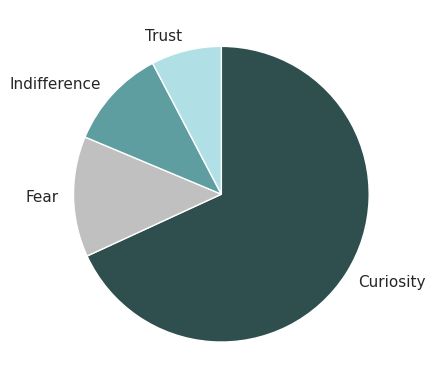

In [21]:
plt.pie(df['Q5.Feelings'].value_counts(ascending=False)[[1,2,3,4]],startangle=90,
        counterclock=False,labels=['Curiosity','Fear','Indifference','Trust'], colors = ['darkslategray', 'silver', 'cadetblue','powderblue'])

**Q5** (“When you think about AI do you feel: Curiosity, Fear, Indifference, Trust”)

**Insights**: It is obvious that students are more curios to find more and learn about AI more then the feeling of trust or fear

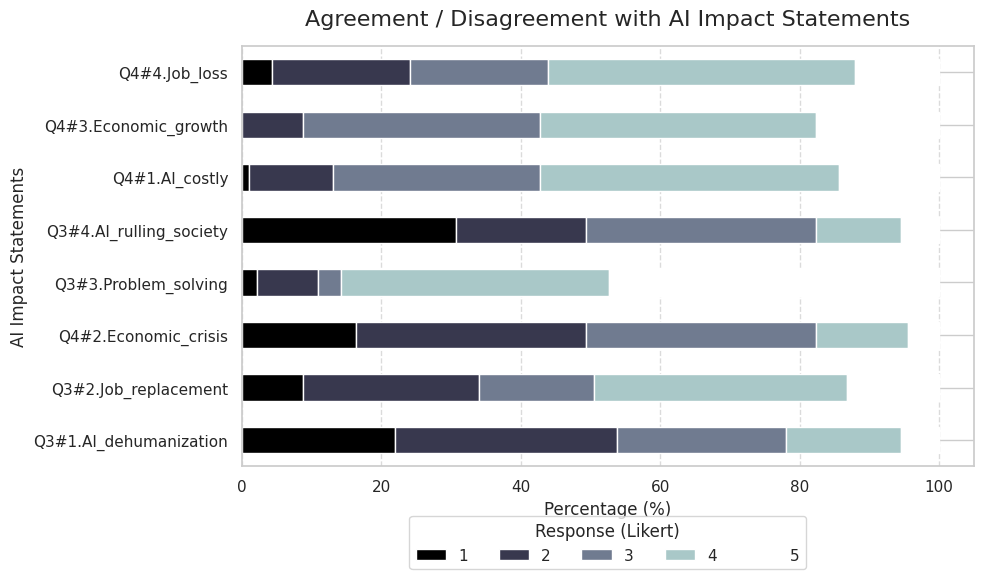

In [32]:

q3_q4_columns = [
    "Q3#1.AI_dehumanization", "Q3#2.Job_replacement", "Q4#2.Economic_crisis",
    "Q3#3.Problem_solving", "Q3#4.AI_rulling_society", "Q4#1.AI_costly",
    "Q4#3.Economic_growth", "Q4#4.Job_loss"
]
response_categories = [1, 2, 3, 4, 5]



q3_q4_summary = pd.concat(
    [df[col].value_counts().sort_index() for col in q3_q4_columns],
    axis=1
).fillna(0)


q3_q4_summary.columns = q3_q4_columns



q3_q4_summary = q3_q4_summary.reindex(response_categories, fill_value=0)

# to convert to percentages
q3_q4_pct = q3_q4_summary.div(q3_q4_summary.sum(axis=0), axis=1) * 100


fig, ax = plt.subplots(figsize=(10, 6))

# To transpose so each question is one bar
q3_q4_pct.T.plot(
    kind='barh',
    stacked=True,
    colormap='bone',
    ax=ax
)

# Styling
ax.set_title("Agreement / Disagreement with AI Impact Statements", fontsize=16, pad=15)
ax.set_xlabel("Percentage (%)", fontsize=12)
ax.set_ylabel("AI Impact Statements", fontsize=12) # Explicitly set y-axis label
ax.legend(
    title="Response (Likert)",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(response_categories)
)
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

**Q3 statements** (“AI helps to solve…”, “AI encourages dehumanization”, “AI will rule society”)

**Q4 statement** (“AI will help global economic growth”)

**Explaination:** The chart above shows the level of agreement and diagreement towords the AI impact for diffrent statments where 1 = Strongly Disagree, 2 = Partially Disagree, 3 = Neutral, 4 = Partially Agree, 5= Fully Agree


/tmp/ipython-input-36-1146948371.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig1 = sns.countplot(


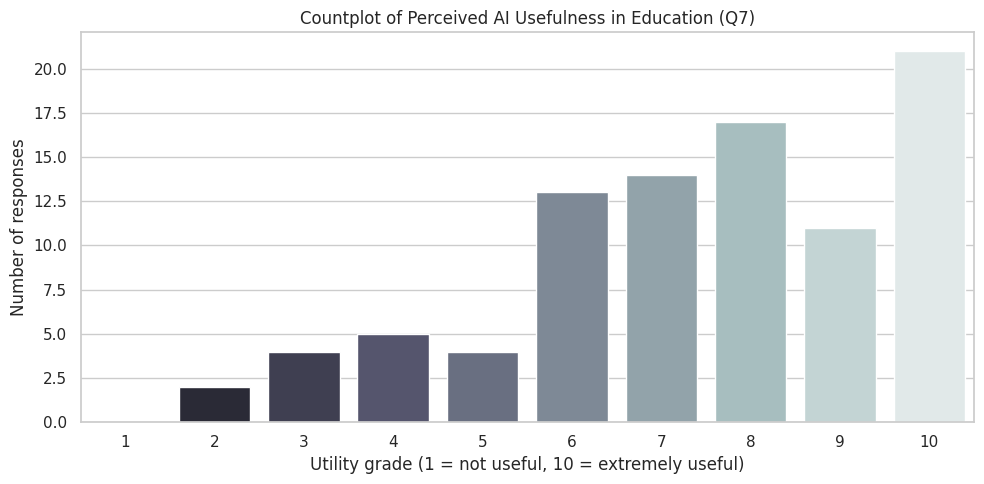

In [36]:

q7_col = 'Q7.Utility_grade'

# Figure size
plt.figure(figsize=(10, 5))

# For the palette
palette = sns.color_palette('bone', n_colors=10)


fig1 = sns.countplot(
    data=df,
    x=q7_col,
    order=range(1, 11),    # ensures we get bars for 1 through 10 in order
    palette=palette
)

#Labels and title
fig1.set(
    xlabel='Utility grade (1 = not useful, 10 = extremely useful)',
    ylabel='Number of responses',
    title='Countplot of Perceived AI Usefulness in Education (Q7)'
)


plt.tight_layout()
plt.show()


**Q7** (“How useful do you think AI would be in the educational process?”)

**Explaination:** The bar chart above shows the level students thinks that AI is usefull.


**Insights:** It shows that the mejority of students belives that using AI is extremely usefull in the educational process

/tmp/ipython-input-47-4118377858.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


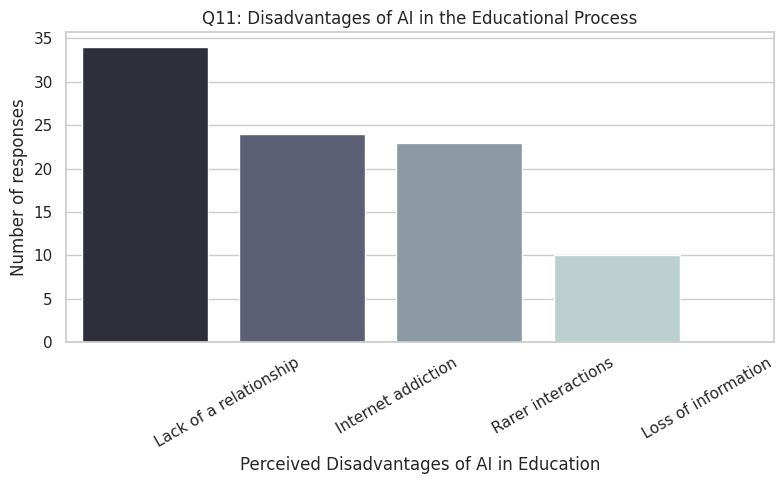

In [47]:

q11_col = 'Q11.Disadvantage_educational_process'

disadv_labels = {
    1: 'Lack of a relationship',
    2: 'Internet addiction',
    3: 'Rarer interactions',
    4: 'Loss of information'
}

# Size
plt.figure(figsize=(8, 5))

# Palette
palette = sns.color_palette('bone', n_colors=len(disadv_labels))

# Graph
ax = sns.countplot(
    data=df,
    x=q11_col,
    order=list(disadv_labels.keys()),   # ensures bars for 1–4 in order
    palette=palette
)

# Change into labels
ax.set_xticks(list(disadv_labels.keys()))
ax.set_xticklabels(list(disadv_labels.values()), rotation=30, ha='right')


# Title the Graph
ax.set(
    xlabel='Perceived Disadvantages of AI in Education',
    ylabel='Number of responses',
    title='Q11: Disadvantages of AI in the Educational Process'
)

plt.tight_layout()
plt.show()



**Q11** (“Main disadvantage of AI in education?”)

**Explaination:** The bar chart above shows  what students thinks is the maost disadvantege of using AI in education


**Insights:** It shows that most of the students thinks that the main concern is the "Lack of Relationships between teachers and educators" and the less concern is the "Loss of information caused by possible system failure" which is a good sign that students acually trust AI

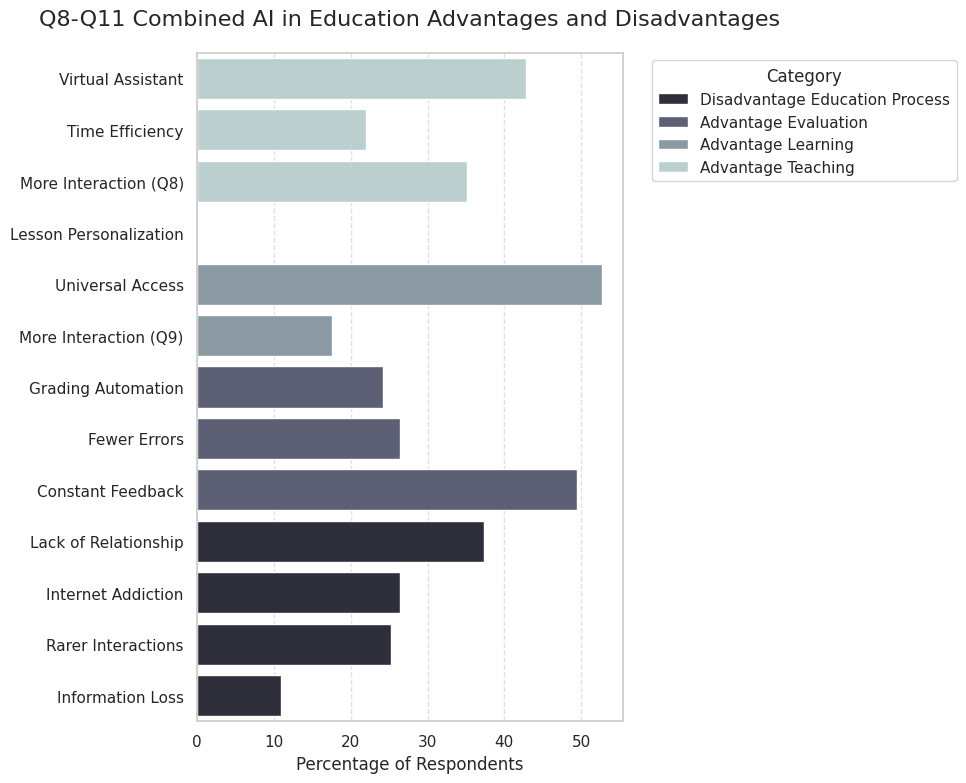

In [73]:
# Starting with the Advanteges

# Naming
q8_col = 'Q8.Advantage_teaching'
q9_col = 'Q9.Advantage_learning'
q10_col = 'Q10.Advantage_evaluation '


# Map the numeric codes to human-readable labels
q8_map = {
    1: "Virtual Assistant",
    2: "Time Efficiency",
    3: "More Interaction (Q8)",
    4: "Other"
}
q9_map = {
    1: "Personalized lessons",
    2: "Universal Access",
    3: "More Interaction (Q9)",
    4: "Other"
}
q10_map = {
    1: "Grading Automation",
    2: "Fewer Errors",
    3: "Constant Feedback",
    4: "Other"
}

# Making a n empty list :)
all_plot_data = []

# Process Q8, Q9, Q10 (Advantages)
for col, mapping, category_name in [
    (q8_col, q8_map, 'Advantage Teaching'),
    (q9_col, q9_map, 'Advantage Learning'),
    (q10_col, q10_map, 'Advantage Evaluation')
]:
    if col in df.columns:
        # Calculate percentages
        counts = df[col].value_counts(normalize=True) * 100
        temp_df = pd.DataFrame({
            'Statement': counts.index.map(mapping),
            'Percent': counts.values,
            'Category': category_name
        })
        # Filtering others
        temp_df = temp_df[temp_df['Statement'] != 'Other']
        all_plot_data.append(temp_df)
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping plot for this question.")









#  Handle Disadvantages

disadvantage_column_mappings = {
    'Lack of Relationship': 'Lack_of_Relationship_Col',
    'Internet Addiction': 'Internet_Addiction_Col',
    'Rarer Interactions': 'Rarer_Interactions_Col',
    'Information Loss': 'Information_Loss_Col'
}


q11_col = 'Q11.Disadvantage_educational_process'
q11_map = {
    1: 'Lack of Relationship',
    2: 'Internet Addiction',
    3: 'Rarer Interactions',
    4: 'Information Loss'
}

if q11_col in df.columns:
    counts_q11 = df[q11_col].value_counts(normalize=True) * 100
    temp_df_q11 = pd.DataFrame({
        'Statement': counts_q11.index.map(q11_map),
        'Percent': counts_q11.values,
        'Category': 'Disadvantage Education Process'
    })
    all_plot_data.append(temp_df_q11)
else:
    print(f"Disadvantage column '{q11_col}' not found. Skipping.")


#  plotting
if all_plot_data:
    plot_df = pd.concat(all_plot_data, ignore_index=True)


    statement_order = [
        'Virtual Assistant',
        'Time Efficiency',
        'More Interaction (Q8)',
        'Lesson Personalization',
        'Universal Access',
        'More Interaction (Q9)',
        'Grading Automation',
        'Fewer Errors',
        'Constant Feedback',
        'Lack of Relationship',
        'Internet Addiction',
        'Rarer Interactions',
        'Information Loss'
    ]

    # Filter plot_df to only include statements in your defined order
    plot_df = plot_df[plot_df['Statement'].isin(statement_order)]


    plot_df['Statement'] = pd.Categorical(plot_df['Statement'], categories=statement_order, ordered=True)
    plot_df = plot_df.sort_values('Statement', ascending=False) # Sort for bottom-up order in plot







    # ---  Plotting the combined bar chart ---

    plt.figure(figsize=(10, 8))



    bone_colors = sns.color_palette('bone', n_colors=len(plot_df['Category'].unique()))

    # Mapping
    category_colors = {category: bone_colors[i] for i, category in enumerate(plot_df['Category'].unique())}


    # Create the barplot
    ax = sns.barplot(data=plot_df, x='Percent', y='Statement', hue='Category', dodge=False, palette=category_colors)

    # Stuling
    ax.set_title('Q8-Q11 Combined AI in Education Advantages and Disadvantages', fontsize=16, pad=20)
    ax.set_xlabel('Percentage of Respondents', fontsize=12)
    ax.set_ylabel('') # Statements are on the y-axis
    ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

else:
    print("No data available to plot after processing.")